Statistical Summary of the Netflix Dataset:
             count          mean           std           min           25%  \
Unnamed: 0  3735.0  1.867000e+03  1.078346e+03  0.000000e+00  9.335000e+02   
Adj_Close   3735.0  2.271797e+02  2.024689e+02  7.018571e+00  4.330786e+01   
Close       3735.0  2.271797e+02  2.024689e+02  7.018571e+00  4.330786e+01   
High        3735.0  2.305070e+02  2.051135e+02  7.178571e+00  4.403071e+01   
Low         3735.0  2.236877e+02  1.997704e+02  6.931429e+00  4.276357e+01   
Open        3735.0  2.271396e+02  2.025024e+02  6.960000e+00  4.314571e+01   
Volume      3735.0  1.676829e+07  1.975776e+07  1.144000e+06  5.388100e+06   

                     50%           75%           max  missing  
Unnamed: 0  1.867000e+03  2.800500e+03  3.734000e+03        0  
Adj_Close   1.564500e+02  3.685950e+02  7.720700e+02        0  
Close       1.564500e+02  3.685950e+02  7.720700e+02        0  
High        1.578500e+02  3.749100e+02  7.730000e+02        0  
Low        

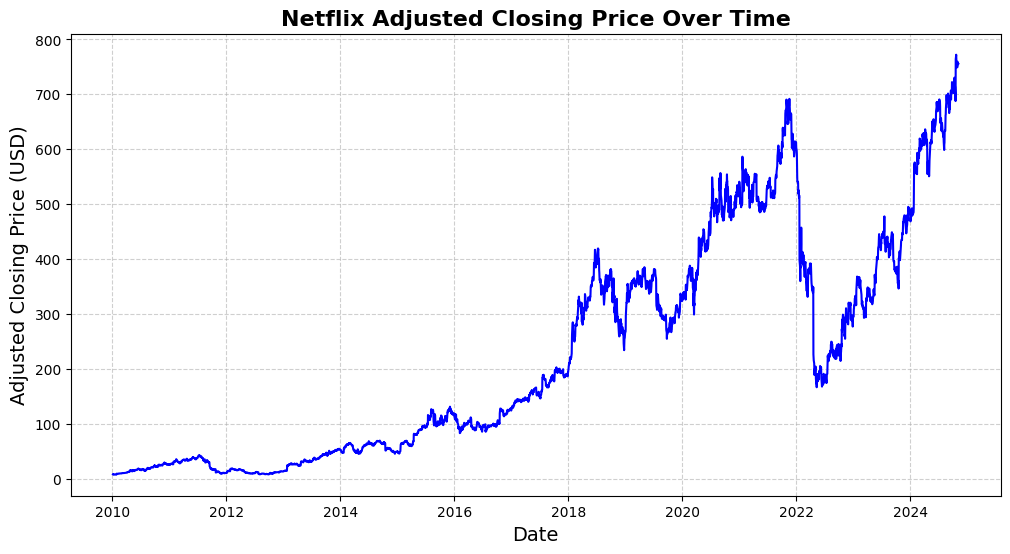

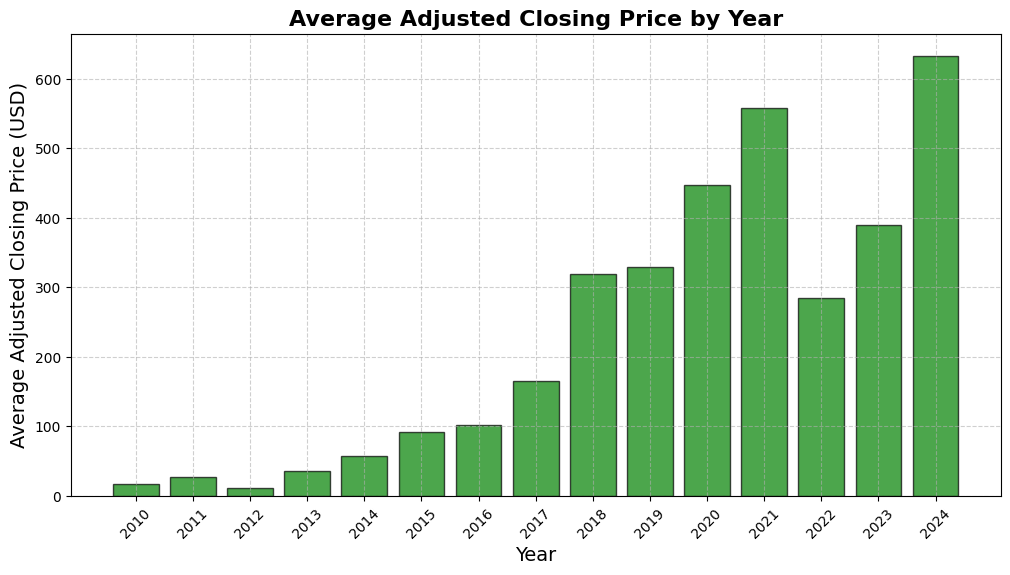

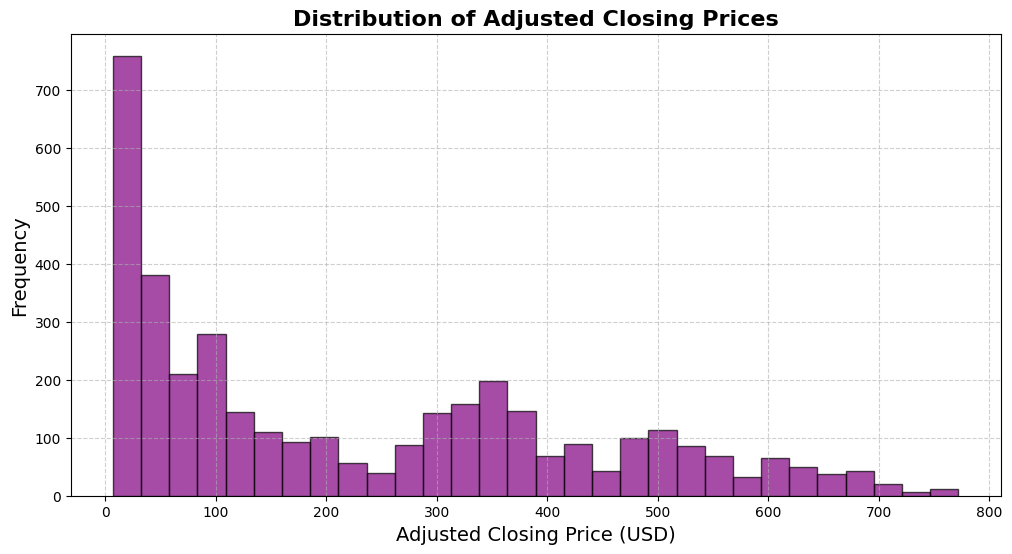

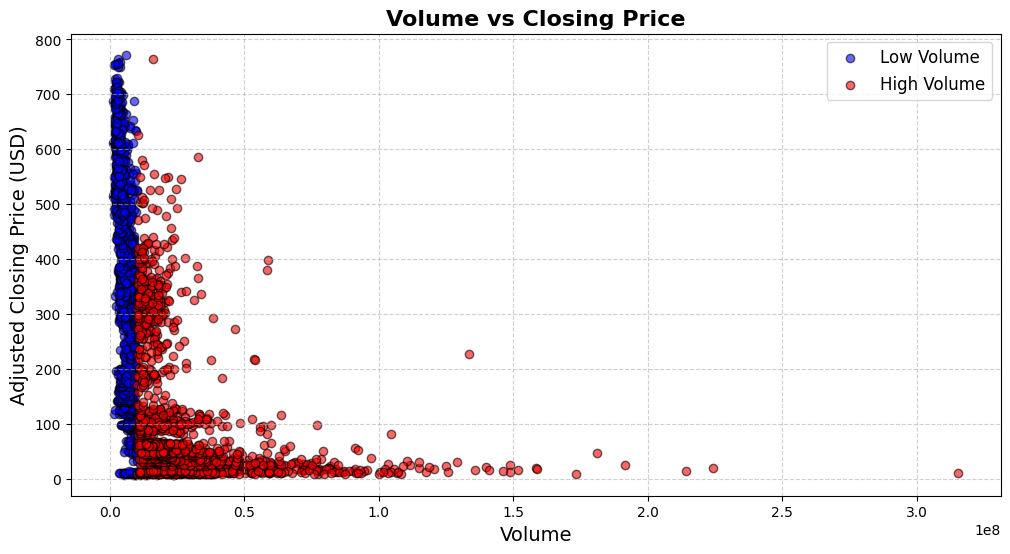

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "D:\\Data Science\\University of Hertfordshire\\Data Handling & Visualization\\Assingments\\Final Visualization Report\\Netflix_Data.csv" 
df = pd.read_csv(file_path)

# Data Cleaning
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' column to datetime format
df.set_index('Date', inplace=True)  # Set 'Date' as the index

# Statistical Summary
def generate_statistical_summary(dataframe):
    """
    Generate a statistical summary of the given dataframe.

    Parameters:
        dataframe (pd.DataFrame): Input dataframe.

    Returns:
        pd.DataFrame: Statistical summary.
    """
    stats = dataframe.describe().T
    stats['missing'] = dataframe.isnull().sum()
    return stats

stats_summary = generate_statistical_summary(df)
print("Statistical Summary of the Netflix Dataset:")
print(stats_summary)

# Plot 1: Line Plot - Adjusted Closing Price Over Time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Adj_Close'], color='blue', linewidth=1.5)
plt.title("Netflix Adjusted Closing Price Over Time", fontsize=16, fontweight='bold')
plt.xlabel("Date", fontsize=14)
plt.ylabel("Adjusted Closing Price (USD)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Plot 2: Bar Chart - Average Adjusted Close Price by Year
df['Year'] = df.index.year  # Extract the year from the Date index
yearly_avg = df.groupby('Year')['Adj_Close'].mean()

plt.figure(figsize=(12, 6))
plt.bar(yearly_avg.index, yearly_avg.values, color='green', edgecolor='black', alpha=0.7)
plt.title("Average Adjusted Closing Price by Year", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Adjusted Closing Price (USD)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(yearly_avg.index, rotation=45)
plt.show()

# Plot 3: Histogram - Distribution of Adjusted Closing Prices
plt.figure(figsize=(12, 6))
plt.hist(df['Adj_Close'], bins=30, color='purple', edgecolor='black', alpha=0.7)
plt.title("Distribution of Adjusted Closing Prices", fontsize=16, fontweight='bold')
plt.xlabel("Adjusted Closing Price (USD)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Plot 4: Scatter Plot - Volume vs Adjusted Closing Price with Two Colors
plt.figure(figsize=(12, 6))

# Define a threshold for volume
threshold = df['Volume'].median()

# Scatter points below the threshold
plt.scatter(
    df[df['Volume'] <= threshold]['Volume'],
    df[df['Volume'] <= threshold]['Adj_Close'],
    alpha=0.6,
    color='blue',
    edgecolor='black',
    label='Low Volume'
)

# Scatter points above the threshold
plt.scatter(
    df[df['Volume'] > threshold]['Volume'],
    df[df['Volume'] > threshold]['Adj_Close'],
    alpha=0.6,
    color='red',
    edgecolor='black',
    label='High Volume'
)

plt.title("Volume vs Closing Price", fontsize=16, fontweight='bold')
plt.xlabel("Volume", fontsize=14)
plt.ylabel("Adjusted Closing Price (USD)", fontsize=14)
plt.legend(fontsize=12, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
